In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing de la data

### Import de la data

In [3]:
file_name = 'consommation-quotidienne-brute-regionale.csv'  # 'consommation-quotidienne-brute.csv'

df_original = pd.read_csv(file_name, sep=';')

### Trier par date et heure croissant

In [4]:
df_filtered = df_original.sort_values(by=['Date', 'Heure'])

### Drop des colomnes inutiles

In [5]:
df_filtered = df_filtered.drop(
    [
        'Date - Heure',
        'Code INSEE région',
        'Statut - GRTgaz',
        'Statut - Teréga',
        'Statut - RTE'
    ],
    axis=1
)

### Drop des champs NAN

In [6]:
df_filtered = df_filtered.dropna(subset='Consommation brute totale (MW)')

### Convertion au format datetime

In [7]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Copules

In [28]:
import seaborn as sns
from statsmodels.tsa.seasonal import STL

In [29]:
print(df_filtered['Région'].unique())

['Normandie' 'Pays de la Loire' 'Auvergne-Rhône-Alpes' 'Grand Est'
 "Provence-Alpes-Côte d'Azur" 'Centre-Val de Loire' 'Île-de-France'
 'Occitanie' 'Bourgogne-Franche-Comté' 'Hauts-de-France' 'Bretagne'
 'Nouvelle-Aquitaine']


### Région Hauts-de-France

In [30]:
df_hdf = df_filtered.loc[df_filtered['Région'] == 'Hauts-de-France']
# daily et que conso totale
df_hdf_totale = df_hdf[['Date', 'Heure', 'Consommation brute totale (MW)']]
df_hdf_totale = df_hdf_totale.groupby(['Date']).sum()
df_hdf_totale = df_hdf_totale['Consommation brute totale (MW)']
df_hdf_totale.sort_index(inplace=True)
df_hdf_totale.head(10)

Date
2013-01-01    262489.0
2013-01-02    402276.0
2013-01-03    398693.0
2013-01-04    397170.0
2013-01-05    374701.0
2013-01-06    358514.0
2013-01-07    415545.0
2013-01-08    451647.0
2013-01-09    464991.0
2013-01-10    453121.0
Name: Consommation brute totale (MW), dtype: float64

### Région Île-de-France

In [31]:
df_idf = df_filtered.loc[df_filtered['Région'] == 'Île-de-France']
# daily et que conso totale
df_idf_totale = df_idf[['Date', 'Heure', 'Consommation brute totale (MW)']]
df_idf_totale = df_idf_totale.groupby(['Date']).sum()
df_idf_totale = df_idf_totale['Consommation brute totale (MW)']
df_idf_totale.sort_index(inplace=True)
df_idf_totale.head(10)

Date
2013-01-01    208420.0
2013-01-02    324636.0
2013-01-03    321196.0
2013-01-04    312121.0
2013-01-05    291643.0
2013-01-06    291589.0
2013-01-07    330374.0
2013-01-08    347680.0
2013-01-09    356805.0
2013-01-10    346686.0
Name: Consommation brute totale (MW), dtype: float64

Région Occitanie

In [32]:
df_occ = df_filtered.loc[df_filtered['Région'] == 'Occitanie']
# daily et que conso totale
df_occ_totale = df_occ[['Date', 'Heure', 'Consommation brute totale (MW)']]
df_occ_totale = df_occ_totale.groupby(['Date']).sum()
df_occ_totale = df_occ_totale['Consommation brute totale (MW)']
df_occ_totale.sort_index(inplace=True)
df_occ_totale.head(10)

Date
2013-01-01    150231.0
2013-01-02    225980.0
2013-01-03    246312.0
2013-01-04    233989.0
2013-01-05    214422.0
2013-01-06    214435.0
2013-01-07    244990.0
2013-01-08    265169.0
2013-01-09    271764.0
2013-01-10    262265.0
Name: Consommation brute totale (MW), dtype: float64

Région Grand-Est

In [33]:
df_ge = df_filtered.loc[df_filtered['Région'] == 'Grand Est']
# daily et que conso totale
df_ge_totale = df_ge[['Date', 'Heure', 'Consommation brute totale (MW)']]
df_ge_totale = df_ge_totale.groupby(['Date']).sum()
df_ge_totale = df_ge_totale['Consommation brute totale (MW)']
df_ge_totale.sort_index(inplace=True)
df_ge_totale.head(10)

Date
2013-01-01    245368.0
2013-01-02    373158.0
2013-01-03    389415.0
2013-01-04    367240.0
2013-01-05    342488.0
2013-01-06    329666.0
2013-01-07    411462.0
2013-01-08    453468.0
2013-01-09    449640.0
2013-01-10    447115.0
Name: Consommation brute totale (MW), dtype: float64

Région Nouvelle Aquitaine

In [34]:
df_na = df_filtered.loc[df_filtered['Région'] == 'Nouvelle-Aquitaine']
# daily et que conso totale
df_na_totale = df_na[['Date', 'Heure', 'Consommation brute totale (MW)']]
df_na_totale = df_na_totale.groupby(['Date']).sum()
df_na_totale = df_na_totale['Consommation brute totale (MW)']
df_na_totale.sort_index(inplace=True)
df_na_totale.head(10)

Date
2013-01-01    173072.0
2013-01-02    282353.0
2013-01-03    289417.0
2013-01-04    279115.0
2013-01-05    269550.0
2013-01-06    273226.0
2013-01-07    314019.0
2013-01-08    327612.0
2013-01-09    325034.0
2013-01-10    306142.0
Name: Consommation brute totale (MW), dtype: float64

## Donnée nuages de points

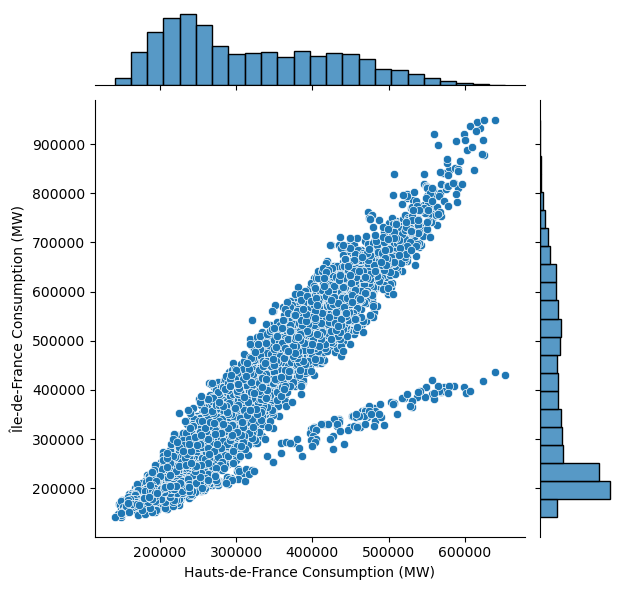

In [35]:
h = sns.jointplot(x=df_hdf_totale, y=df_idf_totale, kind="scatter")
h.set_axis_labels("Hauts-de-France Consumption (MW)","Île-de-France Consumption (MW)")

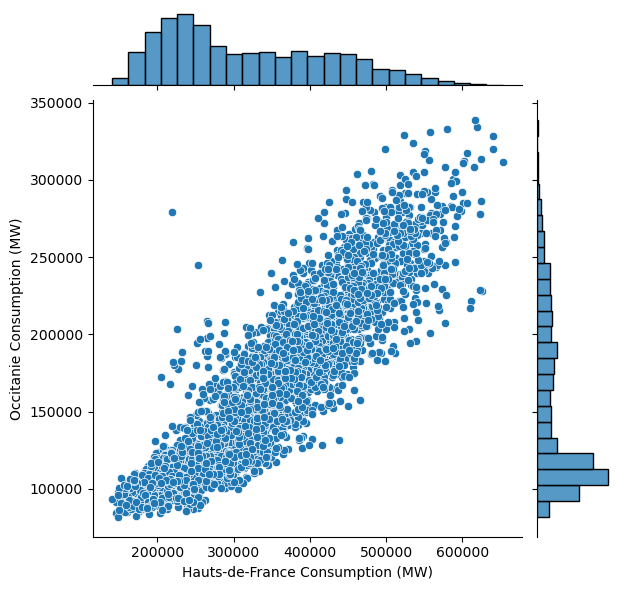

In [36]:
h = sns.jointplot(x=df_hdf_totale, y=df_occ_totale, kind="scatter")
h.set_axis_labels("Hauts-de-France Consumption (MW)","Occitanie Consumption (MW)")

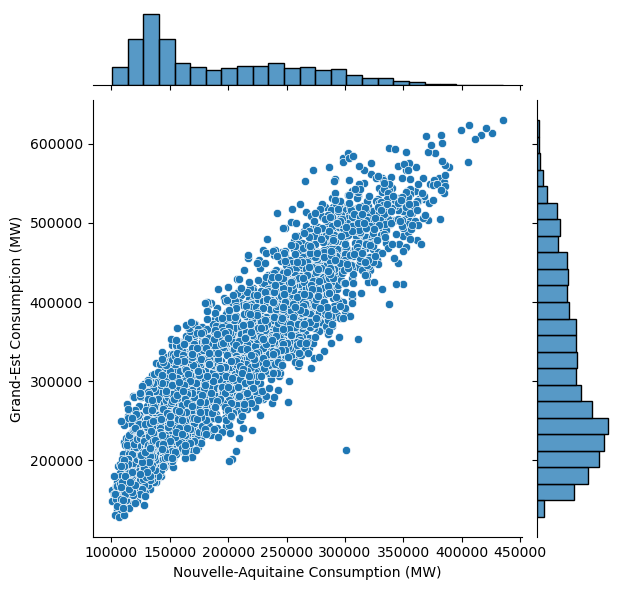

In [38]:
h = sns.jointplot(x=df_na_totale, y=df_ge_totale, kind="scatter")
h.set_axis_labels("Nouvelle-Aquitaine Consumption (MW)","Grand-Est Consumption (MW)")

Pour toutes les régions sauf l'IDF on observe une seule direction, pour IDF HDF on observe 2 directions, on va donc se concentrer sur ce cas spécifique intéressant

## Etude corrélation IDF HDF

### quelques exemples de copules bidimensionnelles classiques

In [42]:
import statsmodels.distributions.copula.api as copulaAPI

frank = copulaAPI.FrankCopula(theta=1)
clayton = copulaAPI.ClaytonCopula(theta=1)
gumbel = copulaAPI.GumbelCopula(theta=2)
gaussian = copulaAPI.GaussianCopula(corr=0.5)
student = copulaAPI.StudentTCopula(corr=0.5)

/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tools/rng_qrng.py:54: FutureWarning: Passing `None` as the seed currently return the NumPy singleton RandomState
(np.random.mtrand._rand). After release 0.13 this will change to using the
default generator provided by NumPy (np.random.default_rng()). If you need
reproducible draws, you should pass a seeded np.random.Generator, e.g.,

import numpy as np
seed = 32839283923801
rng = np.random.default_rng(seed)"

  warnings.warn(_future_warn, FutureWarning)
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tools/rng_qrng.py:54: FutureWarning: Passing `None` as the seed currently return the NumPy singleton RandomState
(np.random.mtrand._rand). After release 0.13 this will change to using the
default generator provided by NumPy (np.random.default_rng()). If you need
reproducible draws, you should pass a seeded np.random.Generator, e.g.,

import numpy as np
seed = 32839283923801
rng = np.random.default_r

/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tools/rng_qrng.py:54: FutureWarning: Passing `None` as the seed currently return the NumPy singleton RandomState
(np.random.mtrand._rand). After release 0.13 this will change to using the
default generator provided by NumPy (np.random.default_rng()). If you need
reproducible draws, you should pass a seeded np.random.Generator, e.g.,

import numpy as np
seed = 32839283923801
rng = np.random.default_rng(seed)"

  warnings.warn(_future_warn, FutureWarning)


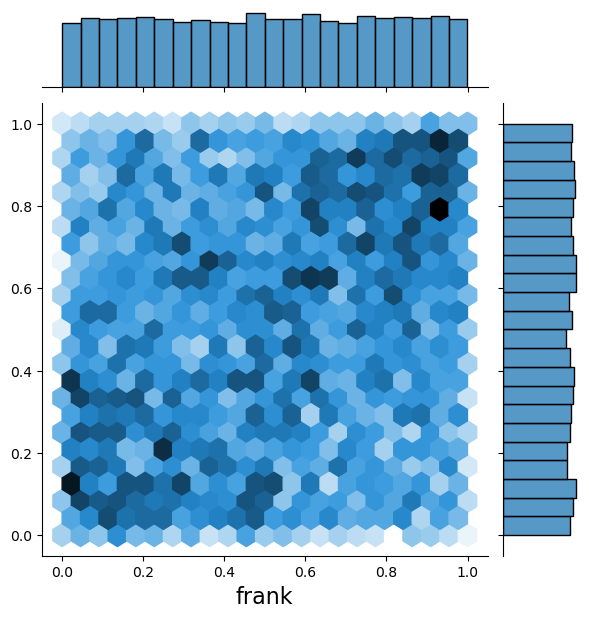

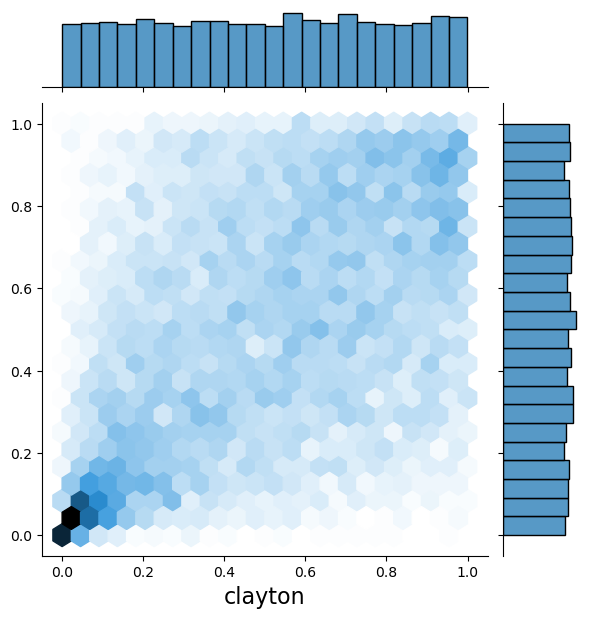

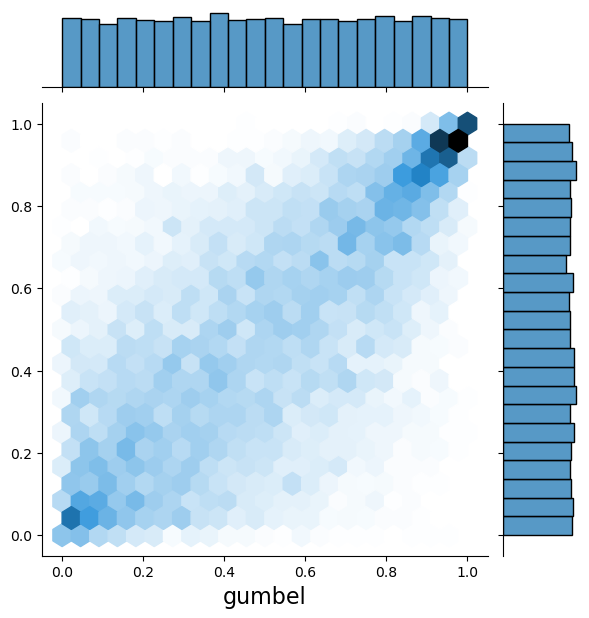

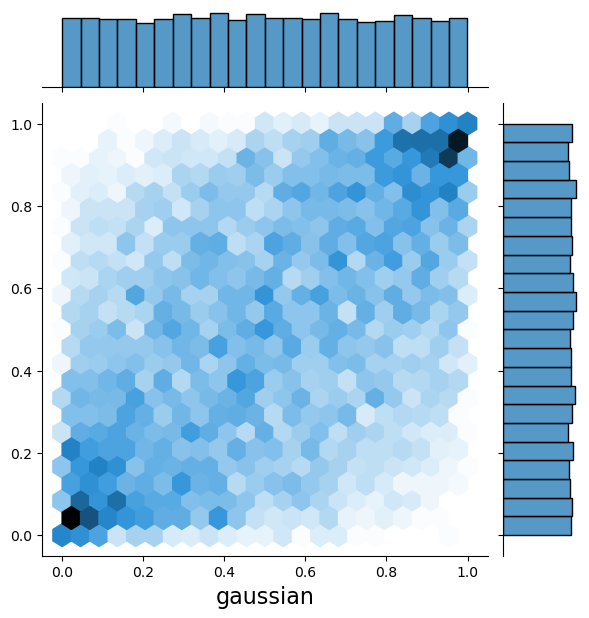

In [44]:
copulas = [frank, clayton, gumbel, gaussian]
copulas_name = ["frank", "clayton", "gumbel", "gaussian"]

for copula, name in zip(copulas, copulas_name):
    sample = copula.rvs(10000)
    h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
    _ = h.set_axis_labels(name, "", fontsize=16)

### densité de notre corrélation

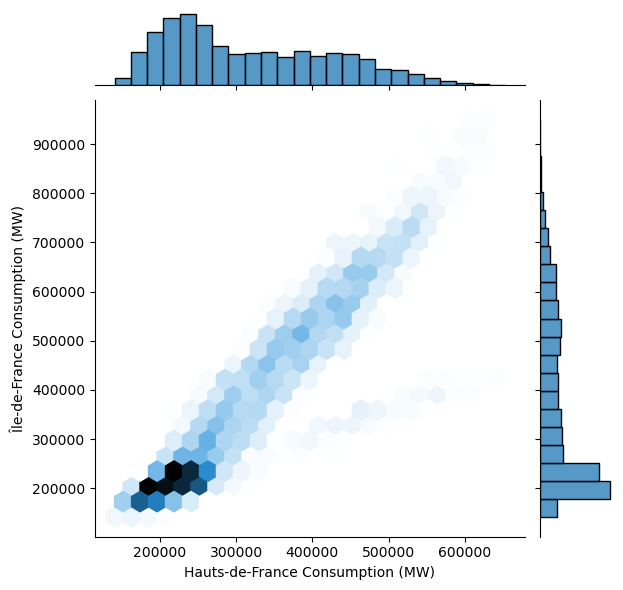

In [45]:
h = sns.jointplot(x=df_hdf_totale, y=df_idf_totale, kind="hex")
h.set_axis_labels("Hauts-de-France Consumption (MW)","Île-de-France Consumption (MW)")

on choisit donc la copule de Clayton qui a une densité plus proche de ce que l'on observe

### Calibration de la copule de Clayton

In [55]:
data_idf_hdf = pd.DataFrame({
    "région hdf": df_hdf_totale,
    "région idf": df_idf_totale
})

data_idf_hdf.head()

,région hdf,région idf
Date,,
2013-01-01,262489.0,208420.0
2013-01-02,402276.0,324636.0
2013-01-03,398693.0,321196.0
2013-01-04,397170.0,312121.0
2013-01-05,374701.0,291643.0


In [56]:
clayton_copula = copulaAPI.ClaytonCopula()
theta = clayton_copula.fit_corr_param(data_idf_hdf)
print(theta)

7.392092671871306


/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tools/rng_qrng.py:54: FutureWarning: Passing `None` as the seed currently return the NumPy singleton RandomState
(np.random.mtrand._rand). After release 0.13 this will change to using the
default generator provided by NumPy (np.random.default_rng()). If you need
reproducible draws, you should pass a seeded np.random.Generator, e.g.,

import numpy as np
seed = 32839283923801
rng = np.random.default_rng(seed)"

  warnings.warn(_future_warn, FutureWarning)


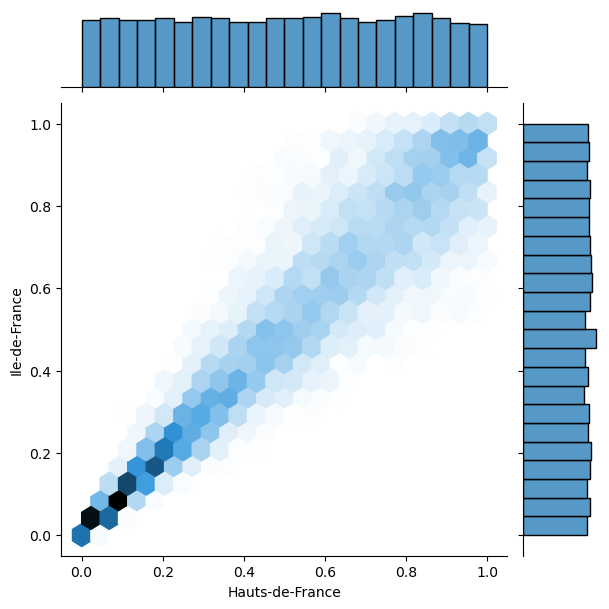

In [57]:
theta = clayton_copula.fit_corr_param(data_idf_hdf)
clayton_fit = copulaAPI.ClaytonCopula(theta=theta)
sample = clayton_fit.rvs(10000)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
h.set_axis_labels("Hauts-de-France", "Ile-de-France")

In [ ]:
# taux de corrélation lambda
2**(-1/theta)

0.9104933029168698